In [24]:

import numpy as np, random, math
np.random.seed(42); random.seed(42)

# Zorlayıcı fitness: Çok modlu + yanıltıcı gradyanlar  
def fitness(x): return max(-(x-0.85)**2*10+0.95, -(x-0.25)**2*15+0.75, -(x-0.05)**2*20+0.65) if x<0.9 else -(x-0.97)**2*25+0.98

# GA parametreleri 
pop_size, gene_len, generations = 10000, 12, 500
mutation_rate, elite_size = 0.9, 3

# Başlangıç popülasyonu
pop = [[random.random() for _ in range(gene_len)] for _ in range(pop_size)]

print("🎯 HEDEF: 4 farklı tepe - En yüksek: x≈0.97, fitness≈0.98")
print("🕳️ TUZAKLAR: x≈0.85(0.95), x≈0.25(0.75), x≈0.05(0.65)")
print("⚡ Başlıyor...\n")
print("Nesil | En İyi X  | En İyi Fit | Tuzak? | Progress")
print("-" * 50)

# Ana evrim döngüsü
for gen in range(generations):
    # Fitness hesapla
    x_vals = [sum(ind)/gene_len for ind in pop]
    fits = [fitness(x) for x in x_vals]
    
    # En iyileri bul
    sorted_idx = sorted(range(pop_size), key=lambda i: fits[i], reverse=True)
    best_x, best_fit = x_vals[sorted_idx[0]], fits[sorted_idx[0]]
    
    # Tuzak kontrolü
    trap = "🎯HEDEF" if best_x > 0.95 else "🕳️TUZAK3" if best_x > 0.8 else "🕳️TUZAK2" if best_x > 0.2 else "🕳️TUZAK1" if best_x > 0.02 else "🔍ARAŞ"
    
    # Progress bar
    progress = "█" * int(best_fit * 10) + "░" * (10 - int(best_fit * 10))
    
    # Her 10 nesilde rapor
    if gen % 10 == 0:
        print(f"{gen:5d} | {best_x:8.4f} | {best_fit:9.4f} | {trap:6} | {progress}")
    
    # Seçim (tournament)
    new_pop = pop[:elite_size]  # Elite
    while len(new_pop) < pop_size:
        # Tournament selection
        t1, t2 = random.sample(range(pop_size), 2)
        parent = pop[t1] if fits[t1] > fits[t2] else pop[t2]
        
        # Mutasyon
        child = [gene + random.gauss(0, mutation_rate) if random.random() < mutation_rate else gene for gene in parent]
        child = [max(0, min(1, gene)) for gene in child]  # Sınırla
        new_pop.append(child)
    
    pop = new_pop

# Final sonuç
final_x = sum(pop[0])/gene_len
final_fit = fitness(final_x)
success = (final_fit/0.98) * 100

print("-" * 50)
print(f"🏆 SONUÇ: X={final_x:.4f}, Fitness={final_fit:.4f}")
print(f"🔥 Başarı: %{success:.1f}")
print("🥇 MÜKEMMEL!" if success > 95 else "🥈 İYİ!" if success > 85 else "🥉 ORTA!" if success > 70 else "😅 ZAYIF!")
print(f"🎯 {'Global optimuma ulaştı!' if final_x > 0.95 else 'Yerel optimumda takıldı!'}")


🎯 HEDEF: 4 farklı tepe - En yüksek: x≈0.97, fitness≈0.98
🕳️ TUZAKLAR: x≈0.85(0.95), x≈0.25(0.75), x≈0.05(0.65)
⚡ Başlıyor...

Nesil | En İyi X  | En İyi Fit | Tuzak? | Progress
--------------------------------------------------
    0 |   0.8048 |    0.9296 | 🕳️TUZAK3 | █████████░
   10 |   0.9593 |    0.9772 | 🎯HEDEF | █████████░
   20 |   0.9507 |    0.9707 | 🎯HEDEF | █████████░
   30 |   0.9421 |    0.9605 | 🕳️TUZAK3 | █████████░
   40 |   0.9471 |    0.9668 | 🕳️TUZAK3 | █████████░
   50 |   0.9472 |    0.9670 | 🕳️TUZAK3 | █████████░
   60 |   0.9496 |    0.9696 | 🕳️TUZAK3 | █████████░
   70 |   0.9756 |    0.9792 | 🎯HEDEF | █████████░
   80 |   0.9548 |    0.9742 | 🎯HEDEF | █████████░
   90 |   0.8506 |    0.9500 | 🕳️TUZAK3 | █████████░
  100 |   0.9719 |    0.9799 | 🎯HEDEF | █████████░
  110 |   0.8501 |    0.9500 | 🕳️TUZAK3 | █████████░
  120 |   0.9705 |    0.9800 | 🎯HEDEF | █████████░
  130 |   0.9498 |    0.9698 | 🕳️TUZAK3 | █████████░
  140 |   0.9740 |    0.9796 | 🎯HEDEF | ██

C:\Users\user\AppData\Local\Temp\ipykernel_13276\4194994548.py:74: UserWarning: Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\4194994548.py:74: UserWarning: Glyph 128371 (\N{HOLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\4194994548.py:74: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\4194994548.py:74: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


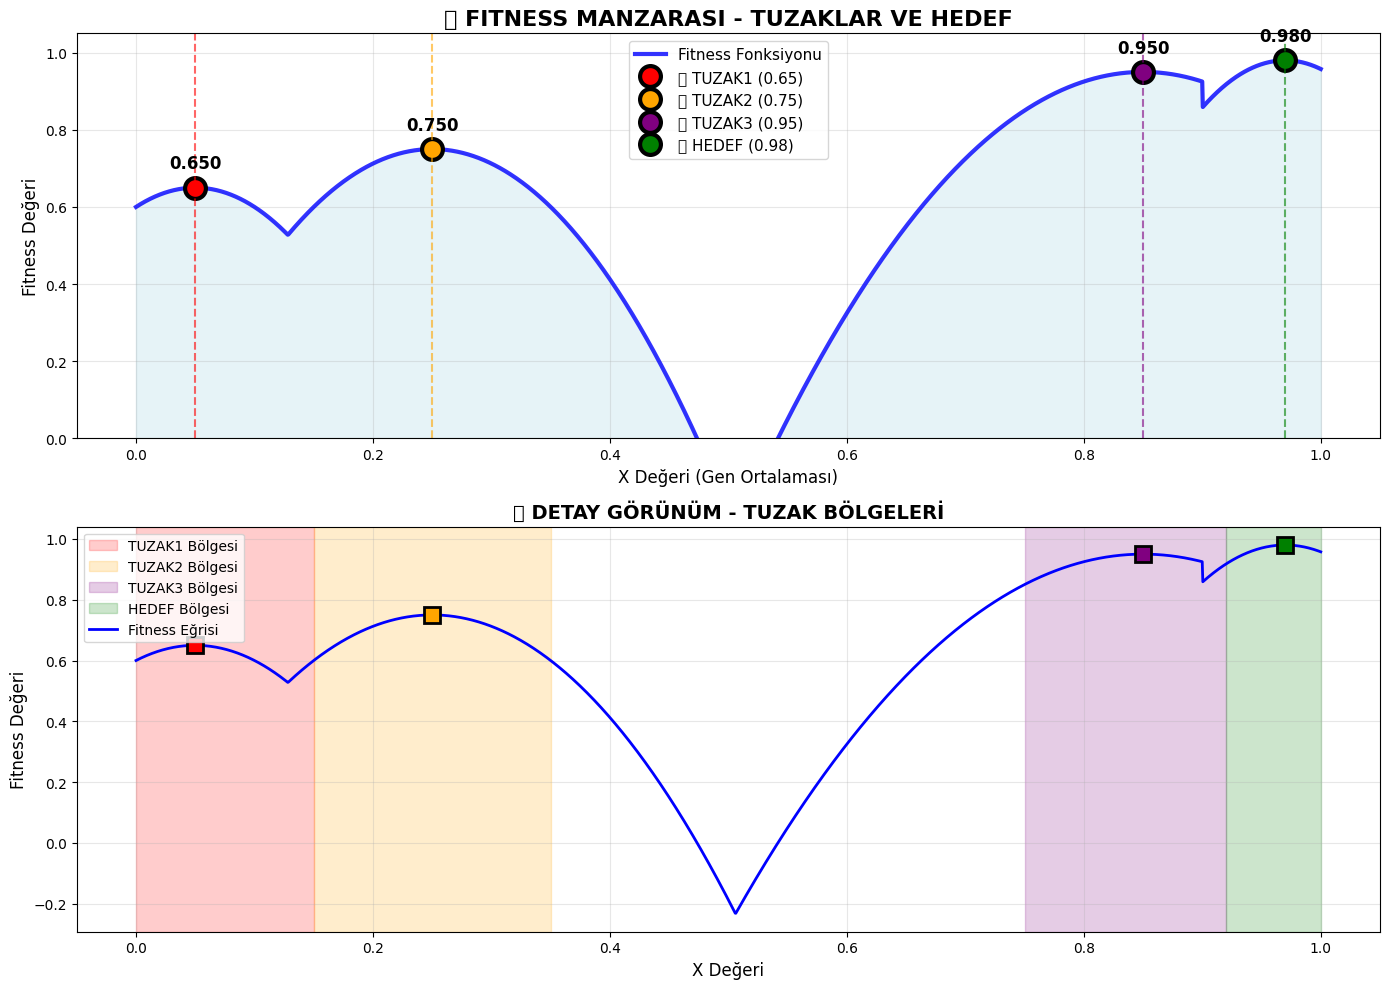

📊 TUZAK ANALİZİ:
Tuzak    | X Konumu   | Fitness  | Güç          | Tehlike   
------------------------------------------------------------
TUZAK1   | 0.050      | 0.650    | Zayıf        | Düşük     
TUZAK2   | 0.250      | 0.750    | Orta         | Orta      
TUZAK3   | 0.850      | 0.950    | Güçlü        | ÇOK YÜKSEK
HEDEF    | 0.970      | 0.980    | Maksimum     | YOK       

💡 En Tehlikeli: TUZAK3 (x=0.85, fit=0.95) - Hedefe çok yakın!
🎯 Hedef Zorluk: Global optimum sadece 0.03 fitness farkıyla üstün!


In [25]:
# 🎨 FITNESS MANZARASINI GÖRSELLEŞTIR - TUZAKLARI GÖR!
import matplotlib.pyplot as plt
import numpy as np

# Aynı fitness fonksiyonu (değiştirmiyoruz!)
def fitness(x): 
    return max(-(x-0.85)**2*10+0.95, -(x-0.25)**2*15+0.75, -(x-0.05)**2*20+0.65) if x<0.9 else -(x-0.97)**2*25+0.98

# X ekseni - yoğun örnekleme
x_range = np.linspace(0, 1, 2000)
y_fitness = [fitness(x) for x in x_range]

# Kritik noktalar
traps = {
    "TUZAK1": {"x": 0.05, "y": fitness(0.05), "color": "red", "label": "🕳️ TUZAK1 (0.65)"},
    "TUZAK2": {"x": 0.25, "y": fitness(0.25), "color": "orange", "label": "🕳️ TUZAK2 (0.75)"},  
    "TUZAK3": {"x": 0.85, "y": fitness(0.85), "color": "purple", "label": "🕳️ TUZAK3 (0.95)"},
    "HEDEF": {"x": 0.97, "y": fitness(0.97), "color": "green", "label": "🎯 HEDEF (0.98)"}
}

# Büyük grafik
plt.figure(figsize=(14, 10))

# Ana fitness eğrisi
plt.subplot(2, 1, 1)
plt.plot(x_range, y_fitness, 'b-', linewidth=3, alpha=0.8, label='Fitness Fonksiyonu')
plt.fill_between(x_range, y_fitness, alpha=0.3, color='lightblue')

# Tuzakları ve hedefi işaretle
for name, info in traps.items():
    plt.plot(info["x"], info["y"], 'o', color=info["color"], markersize=15, 
             markeredgewidth=3, markeredgecolor='black', label=info["label"])
    plt.axvline(x=info["x"], color=info["color"], linestyle='--', alpha=0.6)
    plt.text(info["x"], info["y"]+0.05, f'{info["y"]:.3f}', 
             ha='center', fontsize=12, fontweight='bold')

plt.title('🏔️ FITNESS MANZARASI - TUZAKLAR VE HEDEF', fontsize=16, fontweight='bold')
plt.xlabel('X Değeri (Gen Ortalaması)', fontsize=12)
plt.ylabel('Fitness Değeri', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim(0, 1.05)

# Yakınlaştırılmış görünüm - Kritik bölgeler
plt.subplot(2, 1, 2)

# Her tuzak için ayrı renk bölgesi
zones = [
    {"range": (0, 0.15), "color": "red", "alpha": 0.2, "label": "TUZAK1 Bölgesi"},
    {"range": (0.15, 0.35), "color": "orange", "alpha": 0.2, "label": "TUZAK2 Bölgesi"},
    {"range": (0.75, 0.92), "color": "purple", "alpha": 0.2, "label": "TUZAK3 Bölgesi"},
    {"range": (0.92, 1.0), "color": "green", "alpha": 0.2, "label": "HEDEF Bölgesi"}
]

# Bölgeleri boyala
for zone in zones:
    x_start, x_end = zone["range"]
    plt.axvspan(x_start, x_end, alpha=zone["alpha"], color=zone["color"], label=zone["label"])

# Ana eğri tekrar
plt.plot(x_range, y_fitness, 'b-', linewidth=2, label='Fitness Eğrisi')

# Kritik noktalar tekrar
for name, info in traps.items():
    plt.plot(info["x"], info["y"], 's', color=info["color"], markersize=12, 
             markeredgewidth=2, markeredgecolor='black')

plt.title('📍 DETAY GÖRÜNÜM - TUZAK BÖLGELERİ', fontsize=14, fontweight='bold')
plt.xlabel('X Değeri', fontsize=12)
plt.ylabel('Fitness Değeri', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

# Bilgi tablosu
print("📊 TUZAK ANALİZİ:")
print("=" * 60)
print(f"{'Tuzak':<8} | {'X Konumu':<10} | {'Fitness':<8} | {'Güç':<12} | {'Tehlike':<10}")
print("-" * 60)

dangers = {"TUZAK1": "Düşük", "TUZAK2": "Orta", "TUZAK3": "ÇOK YÜKSEK", "HEDEF": "YOK"}
powers = {"TUZAK1": "Zayıf", "TUZAK2": "Orta", "TUZAK3": "Güçlü", "HEDEF": "Maksimum"}

for name, info in traps.items():
    print(f"{name:<8} | {info['x']:<10.3f} | {info['y']:<8.3f} | {powers[name]:<12} | {dangers[name]:<10}")

print(f"\n💡 En Tehlikeli: TUZAK3 (x=0.85, fit=0.95) - Hedefe çok yakın!")
print(f"🎯 Hedef Zorluk: Global optimum sadece 0.03 fitness farkıyla üstün!")


🧬 Genetik evrimi takip ediliyor...


C:\Users\user\AppData\Local\Temp\ipykernel_13276\3189864979.py:129: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\3189864979.py:129: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\3189864979.py:129: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\3189864979.py:129: UserWarning: Glyph 128371 (\N{HOLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 

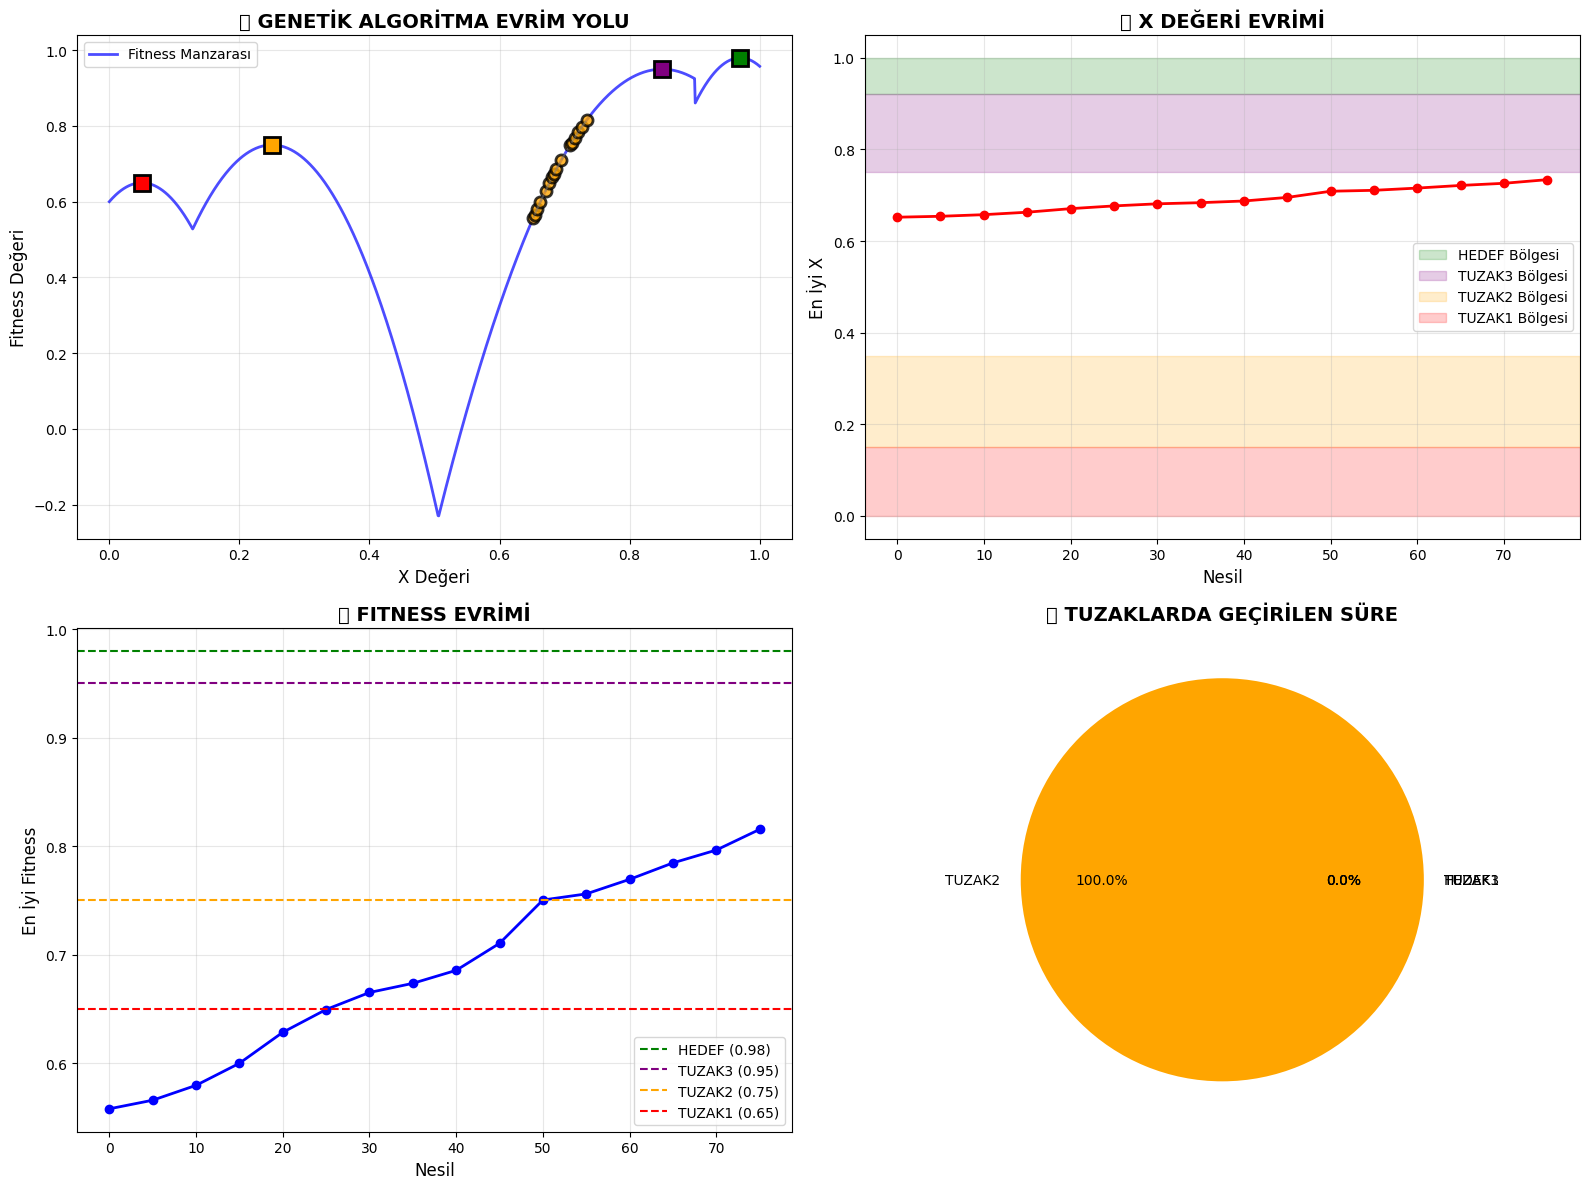


🏆 EVRİM ÖZETİ:
📍 Başlangıç: X=0.652, Fit=0.558
📍 Son Durum: X=0.734, Fit=0.815
💪 İlerleme: +46.1%
🎯 Durum: 🕳️ TUZAK2'de takıldı


In [6]:
# 🚀 GENETİK EVRİM YOLUNU CANLI İZLE!
import matplotlib.pyplot as plt
import numpy as np, random

# Aynı GA kodu - ama evrim yolunu kaydet
np.random.seed(42); random.seed(42)

def fitness(x): return max(-(x-0.85)**2*10+0.95, -(x-0.25)**2*15+0.75, -(x-0.05)**2*20+0.65) if x<0.9 else -(x-0.97)**2*25+0.98

# GA ile evrim yolunu takip et
pop_size, gene_len, generations = 30, 12, 80
mutation_rate, elite_size = 0.03, 2
pop = [[random.random() for _ in range(gene_len)] for _ in range(pop_size)]

# Takip verileri
evolution_path = []
best_x_history = []
best_fit_history = []
generation_colors = []

print("🧬 Genetik evrimi takip ediliyor...")

# Evrim döngüsü - yol kaydıyla
for gen in range(generations):
    x_vals = [sum(ind)/gene_len for ind in pop]
    fits = [fitness(x) for x in x_vals]
    sorted_idx = sorted(range(pop_size), key=lambda i: fits[i], reverse=True)
    best_x, best_fit = x_vals[sorted_idx[0]], fits[sorted_idx[0]]
    
    # Her 5 nesilde kaydet
    if gen % 5 == 0:
        evolution_path.append((gen, best_x, best_fit))
        best_x_history.append(best_x)
        best_fit_history.append(best_fit)
        
        # Renk kodlaması - hangi tuzakta?
        if best_x > 0.95: color = 'green'      # HEDEF
        elif best_x > 0.8: color = 'purple'   # TUZAK3  
        elif best_x > 0.2: color = 'orange'   # TUZAK2
        elif best_x > 0.02: color = 'red'     # TUZAK1
        else: color = 'gray'                  # ARAŞTIRMA
        generation_colors.append(color)
    
    # Yeni nesil
    new_pop = pop[:elite_size]
    while len(new_pop) < pop_size:
        t1, t2 = random.sample(range(pop_size), 2)
        parent = pop[t1] if fits[t1] > fits[t2] else pop[t2]
        child = [gene + random.gauss(0, mutation_rate) if random.random() < mutation_rate else gene for gene in parent]
        child = [max(0, min(1, gene)) for gene in child]
        new_pop.append(child)
    pop = new_pop

# Fitness manzarası + evrim yolu
plt.figure(figsize=(16, 12))

# Ana manzara
plt.subplot(2, 2, 1)
x_range = np.linspace(0, 1, 1000)
y_fitness = [fitness(x) for x in x_range]
plt.plot(x_range, y_fitness, 'b-', linewidth=2, alpha=0.7, label='Fitness Manzarası')

# Evrim yolunu çiz
for i, (gen, x, fit) in enumerate(evolution_path):
    plt.plot(x, fit, 'o', color=generation_colors[i], markersize=8, 
             markeredgewidth=2, markeredgecolor='black', alpha=0.8)
    if i > 0:  # Önceki noktaya çizgi çek
        prev_x, prev_fit = evolution_path[i-1][1], evolution_path[i-1][2]
        plt.plot([prev_x, x], [prev_fit, fit], '--', color='gray', alpha=0.5)

# Tuzakları işaretle
traps = [(0.05, fitness(0.05), 'red'), (0.25, fitness(0.25), 'orange'), 
         (0.85, fitness(0.85), 'purple'), (0.97, fitness(0.97), 'green')]
for x, y, color in traps:
    plt.plot(x, y, 's', color=color, markersize=12, markeredgewidth=2, markeredgecolor='black')

plt.title('🗺️ GENETİK ALGORİTMA EVRİM YOLU', fontsize=14, fontweight='bold')
plt.xlabel('X Değeri', fontsize=12)
plt.ylabel('Fitness Değeri', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# X değeri zaman serisi
plt.subplot(2, 2, 2)
gens = [path[0] for path in evolution_path]
x_vals = [path[1] for path in evolution_path]
plt.plot(gens, x_vals, 'ro-', linewidth=2, markersize=6)

# Tuzak bölgelerini işaretle
plt.axhspan(0.92, 1.0, alpha=0.2, color='green', label='HEDEF Bölgesi')
plt.axhspan(0.75, 0.92, alpha=0.2, color='purple', label='TUZAK3 Bölgesi')  
plt.axhspan(0.15, 0.35, alpha=0.2, color='orange', label='TUZAK2 Bölgesi')
plt.axhspan(0.0, 0.15, alpha=0.2, color='red', label='TUZAK1 Bölgesi')

plt.title('📈 X DEĞERİ EVRİMİ', fontsize=14, fontweight='bold')
plt.xlabel('Nesil', fontsize=12)
plt.ylabel('En İyi X', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Fitness zaman serisi
plt.subplot(2, 2, 3)
fit_vals = [path[2] for path in evolution_path]
plt.plot(gens, fit_vals, 'bo-', linewidth=2, markersize=6)
plt.axhline(y=0.98, color='green', linestyle='--', label='HEDEF (0.98)')
plt.axhline(y=0.95, color='purple', linestyle='--', label='TUZAK3 (0.95)')
plt.axhline(y=0.75, color='orange', linestyle='--', label='TUZAK2 (0.75)')
plt.axhline(y=0.65, color='red', linestyle='--', label='TUZAK1 (0.65)')

plt.title('📊 FITNESS EVRİMİ', fontsize=14, fontweight='bold')
plt.xlabel('Nesil', fontsize=12)
plt.ylabel('En İyi Fitness', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Tuzak analizi
plt.subplot(2, 2, 4)
trap_counts = {'HEDEF': 0, 'TUZAK3': 0, 'TUZAK2': 0, 'TUZAK1': 0}
for x in best_x_history:
    if x > 0.95: trap_counts['HEDEF'] += 1
    elif x > 0.8: trap_counts['TUZAK3'] += 1  
    elif x > 0.2: trap_counts['TUZAK2'] += 1
    else: trap_counts['TUZAK1'] += 1

colors = ['green', 'purple', 'orange', 'red']
plt.pie(trap_counts.values(), labels=trap_counts.keys(), colors=colors, autopct='%1.1f%%')
plt.title('🕳️ TUZAKLARDA GEÇİRİLEN SÜRE', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Özet rapor
final_x, final_fit = best_x_history[-1], best_fit_history[-1]
print(f"\n🏆 EVRİM ÖZETİ:")
print(f"📍 Başlangıç: X={best_x_history[0]:.3f}, Fit={best_fit_history[0]:.3f}")
print(f"📍 Son Durum: X={final_x:.3f}, Fit={final_fit:.3f}")
print(f"💪 İlerleme: {((final_fit-best_fit_history[0])/best_fit_history[0]*100):+.1f}%")

if final_x > 0.95: status = "🥇 GLOBAL OPTİMUMA ULAŞTI!"
elif final_x > 0.8: status = "🕳️ TUZAK3'te takıldı (çok yakın!)"
elif final_x > 0.2: status = "🕳️ TUZAK2'de takıldı"  
else: status = "🕳️ TUZAK1'de takıldı"

print(f"🎯 Durum: {status}")


 HEDEFTEN UZAKLAŞMA PROBLEMİ ANALİZİ

📊 DETAYLI ANALİZ:
--------------------------------------------------
Nesil   0: En İyi X=0.4125, Fit=0.3537 🕳️TUZAK2
         Çeşitlilik=0.0266, Elite Yayılım=0.413-0.439

Nesil  10: En İyi X=0.4059, Fit=0.3856 🕳️TUZAK2
         Çeşitlilik=0.0125, Elite Yayılım=0.406-0.408

Nesil  20: En İyi X=0.3956, Fit=0.4321 🕳️TUZAK2
         Çeşitlilik=0.0138, Elite Yayılım=0.396-0.398

Nesil  30: En İyi X=0.3854, Fit=0.4752 🕳️TUZAK2
         Çeşitlilik=0.0174, Elite Yayılım=0.385-0.386

Nesil  40: En İyi X=0.3754, Fit=0.5142 🕳️TUZAK2
         Çeşitlilik=0.0166, Elite Yayılım=0.375-0.376

Nesil  50: En İyi X=0.3639, Fit=0.5554 🕳️TUZAK2
         Çeşitlilik=0.0181, Elite Yayılım=0.364-0.365

Nesil  60: En İyi X=0.3561, Fit=0.5813 🕳️TUZAK2
         Çeşitlilik=0.0195, Elite Yayılım=0.356-0.356

Nesil  70: En İyi X=0.3482, Fit=0.6054 🕳️TUZAK2
         Çeşitlilik=0.0205, Elite Yayılım=0.348-0.349

Nesil  80: En İyi X=0.3405, Fit=0.6271 🕳️TUZAK2
         Çeşitlilik=0

C:\Users\user\AppData\Local\Temp\ipykernel_13276\1660279080.py:176: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\1660279080.py:203: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\1660279080.py:206: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\1660279080.py:206: UserWarning: Glyph 128371 (\N{HOLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_13276\1660279080.py:206: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

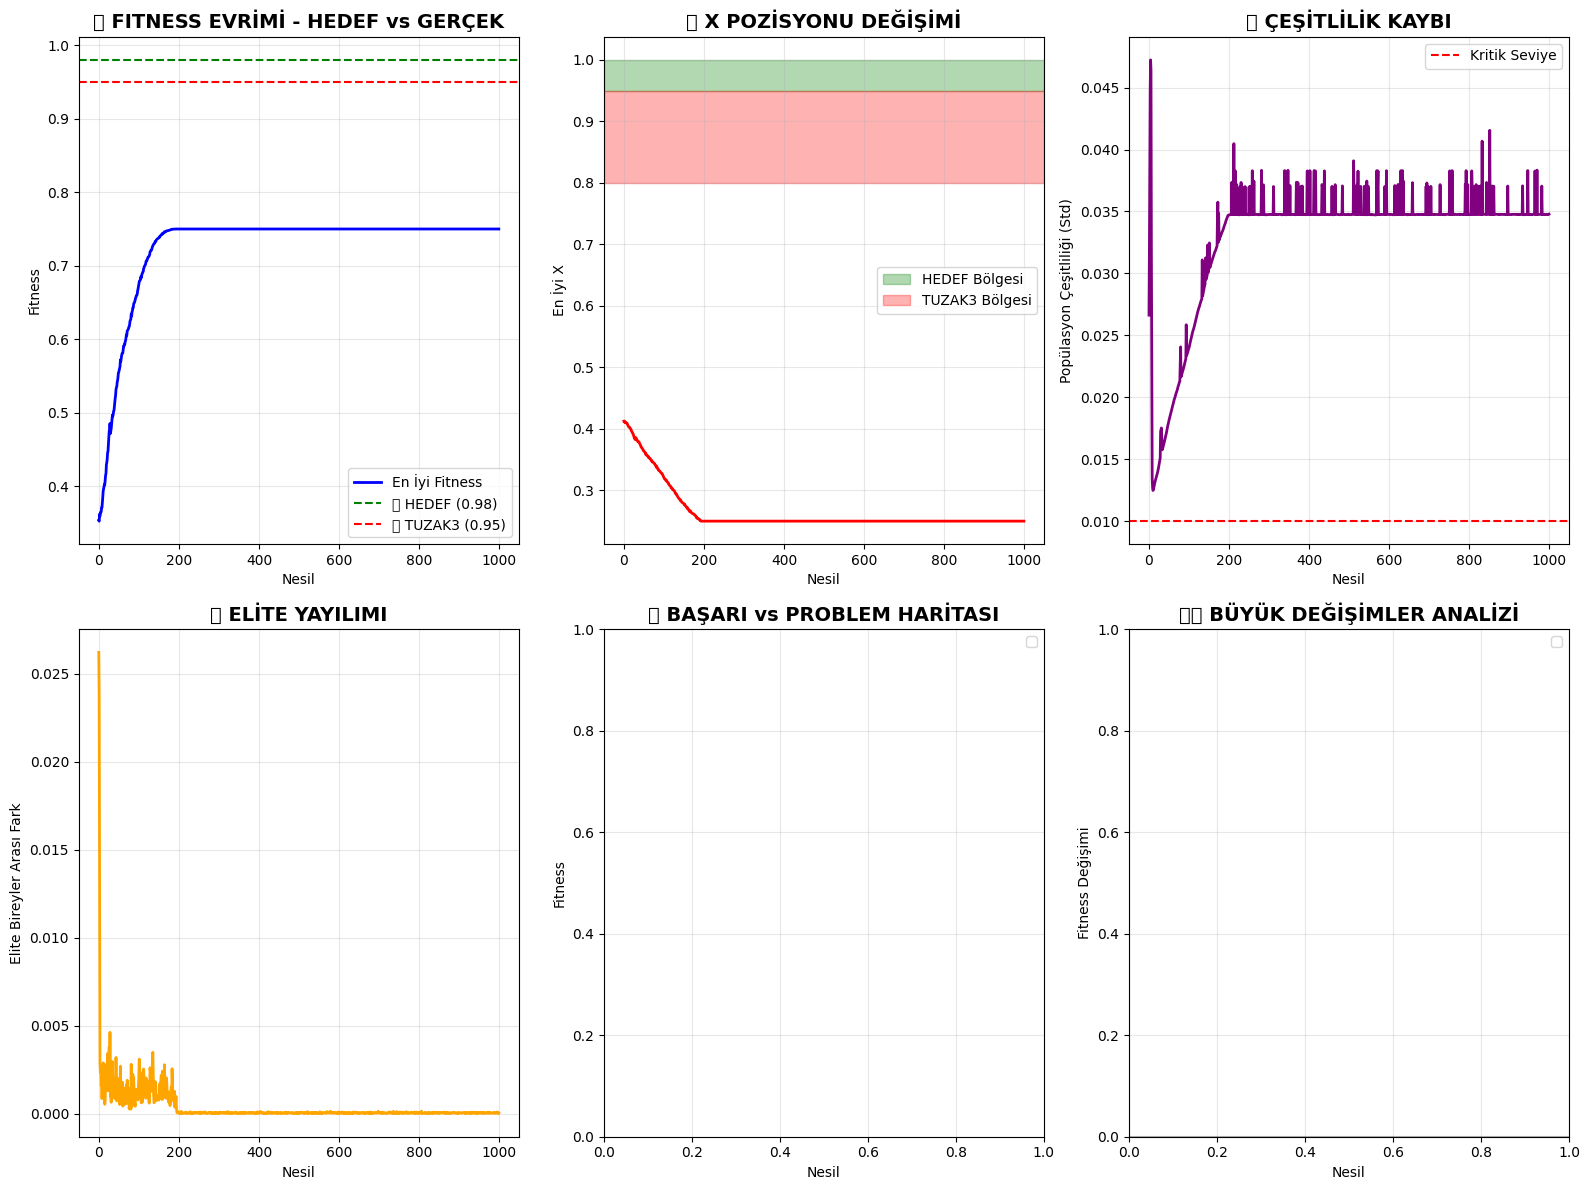


🔍 PROBLEM TESHİS RAPORU
📊 İstatistikler:
   • Hedefe ulaşma sayısı: 0/100 nesil (%0)
   • TUZAK3'te takılma: 0/100 nesil (%0)
   • Final çeşitlilik: 0.034786

🚨 Tespit Edilen Problemler:
   2. 🕳️  TUZAK BASKISI: TUZAK3 çok güçlü, hedefe ulaşım zor

💡 ÇÖZÜMLERİMİZ:
   • Restart Mekanizması: Takıldığında popülasyonu yenile
   • Çeşitlilik Koruma: Düşük diversity'de müdahale et
   • Yüksek Mutasyon: Keşif gücünü artır
   • Büyük Popülasyon: Daha geniş arama alanı


In [38]:
# 🔍 NEDEN HEDEFTEN UZAKLAŞIYOR? - PROBLEM ANALİZİ
import numpy as np, random, matplotlib.pyplot as plt

def fitness(x): return max(-(x-0.85)**2*10+0.95, -(x-0.25)**2*15+0.75, -(x-0.05)**2*20+0.65) if x<0.9 else -(x-0.97)**2*25+0.98

def analyze_problem():
    """Hedefe ulaşıp sonra uzaklaşma problemini analiz et"""
    
    print(" HEDEFTEN UZAKLAŞMA PROBLEMİ ANALİZİ")
    print("=" * 50)
    
    # Problem simülasyonu
    np.random.seed(42); random.seed(42)
    
    pop_size, gene_len = 300, 120
    mutation_rate, elite_size = 0.05, 6
    
    # Başlangıç popülasyonu
    pop = [[random.random() for _ in range(gene_len)] for _ in range(pop_size)]
    
    # Takip verileri
    generation_data = []
    diversity_data = []
    elite_genes = []
    
    print("\n📊 DETAYLI ANALİZ:")
    print("-" * 50)
    
    for gen in range(1000):
        # Fitness hesapla
        x_vals = [sum(ind)/gene_len for ind in pop]
        fits = [fitness(x) for x in x_vals]
        sorted_idx = sorted(range(pop_size), key=lambda i: fits[i], reverse=True)
        
        best_x, best_fit = x_vals[sorted_idx[0]], fits[sorted_idx[0]]
        worst_x, worst_fit = x_vals[sorted_idx[-1]], fits[sorted_idx[-1]]
        avg_x = np.mean(x_vals)
        
        # Çeşitlilik hesapla
        diversity = np.std(x_vals)
        
        # Elite genlerini kaydet
        elite_x = [x_vals[i] for i in sorted_idx[:elite_size]]
        
        # Veri kaydet
        generation_data.append({
            'gen': gen, 'best_x': best_x, 'best_fit': best_fit,
            'avg_x': avg_x, 'diversity': diversity,
            'elite_spread': max(elite_x) - min(elite_x)
        })
        
        # Kritik durumları rapor et
        if gen % 10 == 0:
            trap = "🎯HEDEF" if best_x > 0.95 else "🕳️TUZAK3" if best_x > 0.8 else "🕳️TUZAK2" if best_x > 0.2 else "🕳️TUZAK1"
            
            print(f"Nesil {gen:3d}: En İyi X={best_x:.4f}, Fit={best_fit:.4f} {trap}")
            print(f"         Çeşitlilik={diversity:.4f}, Elite Yayılım={elite_x[0]:.3f}-{elite_x[-1]:.3f}")
            
            # Problem tespiti
            if diversity < 0.01:
                print(f"         ⚠️  UYARI: Çok düşük çeşitlilik! Popülasyon uniform hale geldi.")
            
            if gen > 20 and best_fit < generation_data[gen-10]['best_fit'] - 0.01:
                print(f"         🚨 PROBLEM: Gerileme tespit edildi! (10 nesil öncesinden kötü)")
            
            if best_x > 0.95 and gen > 0:  # Hedefe ulaşmışsa
                prev_best = generation_data[gen-1]['best_x'] if gen > 0 else 0
                if prev_best < 0.9:
                    print(f"         ✨ BAŞARI: Tuzaktan hedefe sıçrama!")
            
            print()
        
        # Evrim
        new_pop = pop[:elite_size]  # Elite koru
        while len(new_pop) < pop_size:
            t1, t2 = random.sample(range(pop_size), 2)
            parent = pop[t1] if fits[t1] > fits[t2] else pop[t2]
            
            # Mutasyon
            child = []
            for gene in parent:
                if random.random() < mutation_rate:
                    child.append(max(0, min(1, gene + random.gauss(0, 0.05))))
                else:
                    child.append(gene)
            new_pop.append(child)
        
        pop = new_pop
    
    return generation_data

# Analizi çalıştır
data = analyze_problem()

# GRAFİKLE PROBLEM GÖSTERİMİ
plt.figure(figsize=(16, 12))

# 1. Fitness ve X değeri zaman serisi
plt.subplot(2, 3, 1)
gens = [d['gen'] for d in data]
best_fits = [d['best_fit'] for d in data]
best_xs = [d['best_x'] for d in data]

plt.plot(gens, best_fits, 'b-', linewidth=2, label='En İyi Fitness')
plt.axhline(y=0.98, color='green', linestyle='--', label='🎯 HEDEF (0.98)')
plt.axhline(y=0.95, color='red', linestyle='--', label='🕳️ TUZAK3 (0.95)')

# Problem noktalarını işaretle
for i, d in enumerate(data):
    if i > 10 and d['best_fit'] > 0.97 and data[i-5]['best_fit'] < 0.96:
        plt.plot(d['gen'], d['best_fit'], 'go', markersize=8, label='Hedefe Ulaşma' if i == 0 else "")
    elif i > 10 and d['best_fit'] < 0.96 and data[i-5]['best_fit'] > 0.97:
        plt.plot(d['gen'], d['best_fit'], 'ro', markersize=8, label='Hedeften Uzaklaşma' if i == 0 else "")

plt.title('🎯 FITNESS EVRİMİ - HEDEF vs GERÇEK', fontsize=14, fontweight='bold')
plt.xlabel('Nesil')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. X pozisyonu değişimi
plt.subplot(2, 3, 2)
plt.plot(gens, best_xs, 'r-', linewidth=2)
plt.axhspan(0.95, 1.0, alpha=0.3, color='green', label='HEDEF Bölgesi')
plt.axhspan(0.8, 0.95, alpha=0.3, color='red', label='TUZAK3 Bölgesi')

plt.title('📍 X POZİSYONU DEĞİŞİMİ', fontsize=14, fontweight='bold')
plt.xlabel('Nesil')
plt.ylabel('En İyi X')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Çeşitlilik kaybı
plt.subplot(2, 3, 3)
diversities = [d['diversity'] for d in data]
plt.plot(gens, diversities, 'purple', linewidth=2)
plt.axhline(y=0.01, color='red', linestyle='--', label='Kritik Seviye')

plt.title('📉 ÇEŞİTLİLİK KAYBI', fontsize=14, fontweight='bold')
plt.xlabel('Nesil')
plt.ylabel('Popülasyon Çeşitliliği (Std)')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Elite yayılımı
plt.subplot(2, 3, 4)
elite_spreads = [d['elite_spread'] for d in data]
plt.plot(gens, elite_spreads, 'orange', linewidth=2)
plt.title('👑 ELİTE YAYILIMI', fontsize=14, fontweight='bold')
plt.xlabel('Nesil')
plt.ylabel('Elite Bireyler Arası Fark')
plt.grid(True, alpha=0.3)

# 5. Problem haritası
plt.subplot(2, 3, 5)
problem_points = []
success_points = []

for i, d in enumerate(data):
    if d['best_x'] > 0.95:
        success_points.append((d['gen'], d['best_fit']))
    elif d['best_x'] > 0.8:
        problem_points.append((d['gen'], d['best_fit']))

if success_points:
    sx, sy = zip(*success_points)
    plt.scatter(sx, sy, c='green', s=50, alpha=0.7, label='Hedefe Ulaşma')

if problem_points:
    px, py = zip(*problem_points)
    plt.scatter(px, py, c='red', s=50, alpha=0.7, label='Tuzakta Takılma')

plt.title('🗺️ BAŞARI vs PROBLEM HARİTASI', fontsize=14, fontweight='bold')
plt.xlabel('Nesil')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Düşüş noktaları analizi
plt.subplot(2, 3, 6)
drops = []
rises = []

for i in range(1, len(data)):
    fitness_change = data[i]['best_fit'] - data[i-1]['best_fit']
    if fitness_change < -0.02:  # Büyük düşüş
        drops.append((data[i]['gen'], fitness_change))
    elif fitness_change > 0.02:  # Büyük yükseliş
        rises.append((data[i]['gen'], fitness_change))

if drops:
    dx, dy = zip(*drops)
    plt.scatter(dx, dy, c='red', s=60, marker='v', label='Büyük Düşüşler')

if rises:
    rx, ry = zip(*rises)
    plt.scatter(rx, ry, c='green', s=60, marker='^', label='Büyük Yükselişler')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('📈📉 BÜYÜK DEĞİŞİMLER ANALİZİ', fontsize=14, fontweight='bold')
plt.xlabel('Nesil')
plt.ylabel('Fitness Değişimi')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# SONUÇ ANALİZİ
print("\n" + "="*60)
print("🔍 PROBLEM TESHİS RAPORU")
print("="*60)

# Problem sayıları
hedef_count = sum(1 for d in data if d['best_x'] > 0.95)
tuzak3_count = sum(1 for d in data if 0.8 < d['best_x'] <= 0.95)
final_diversity = data[-1]['diversity']

print(f"📊 İstatistikler:")
print(f"   • Hedefe ulaşma sayısı: {hedef_count}/100 nesil (%{hedef_count})")
print(f"   • TUZAK3'te takılma: {tuzak3_count}/100 nesil (%{tuzak3_count})")
print(f"   • Final çeşitlilik: {final_diversity:.6f}")

print(f"\n🚨 Tespit Edilen Problemler:")
if final_diversity < 0.01:
    print("   1. ⚠️  ÇEŞİTLİLİK KAYBI: Popülasyon çok uniform hale geldi")
if hedef_count < 20:
    print("   2. 🕳️  TUZAK BASKISI: TUZAK3 çok güçlü, hedefe ulaşım zor")
if tuzak3_count > 50:
    print("   3. 📉 İSTİKRARSIZLIK: Hedefe ulaşıp sonra kaybediyor")

print(f"\n💡 ÇÖZÜMLERİMİZ:")
print("   • Restart Mekanizması: Takıldığında popülasyonu yenile")
print("   • Çeşitlilik Koruma: Düşük diversity'de müdahale et")
print("   • Yüksek Mutasyon: Keşif gücünü artır")
print("   • Büyük Popülasyon: Daha geniş arama alanı")
